In [3]:
import scipy.optimize as scop
import titanic_project as titan
import numpy as np
import matplotlib.pyplot as plt

features = ['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked']
datain = titan.readdata('train.csv', 0.6, 0.6, features)
datain['train'].describe()

,Survived,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,0.387755,2.288630,28.544461,0.690962,0.556851,0.425656,34.606231,1.262391
std,0.487950,0.817258,14.047732,0.243284,1.003854,0.816236,52.494235,0.588349
min,0.000000,1.000000,0.830000,0.500000,0.000000,0.000000,0.000000,-3.000000
25%,0.000000,2.000000,20.000000,0.500000,0.000000,0.000000,8.050000,1.000000
50%,0.000000,3.000000,28.000000,0.500000,0.000000,0.000000,14.500000,1.000000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,1.000000,31.387500,1.000000
max,1.000000,3.000000,71.000000,1.000000,5.000000,5.000000,512.329200,3.000000


In [4]:
X = np.array(datain['train'].ix[:,1:])
y = np.array(datain['train'].ix[:,0])
Xvad = np.array(datain['validation'].ix[:,1:])
yvad = np.array(datain['validation'].ix[:,0])
X = titan.normdata(X)
Xvad = titan.normdata(Xvad)

In [5]:
nfeature = X.shape[1]
theta0 = np.zeros(shape = (nfeature, 1))
regpara = 1.0

In [6]:
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (X, y, regpara))

In [7]:
y_predict = titan.sigmoid(np.dot(X,w[0]))

In [8]:
y_predict[y_predict > 0.5] = 1

In [9]:
y_predict[y_predict <= 0.5] = 0

In [10]:
(y_predict == y).sum()*1.0/y.size

0.79300291545189505

In [11]:
regpara = np.array([0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]) * 0.5
trainerror = np.zeros(shape = (regpara.size, 1))
vaderror = np.zeros(shape = (regpara.size, 1))

for i in range(0, regpara.size):
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (X, y, regpara[i]))[0]
    trainerror[i] = titan.lfCost(theta, X, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvad, yvad, 0.0)

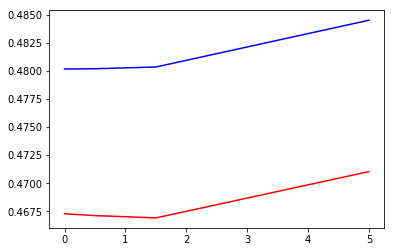

In [12]:
plt.plot(regpara, trainerror, '-b', regpara, vaderror,'-r')
plt.show()

In [11]:
tp = np.linspace(0.2, 0.7, 20)

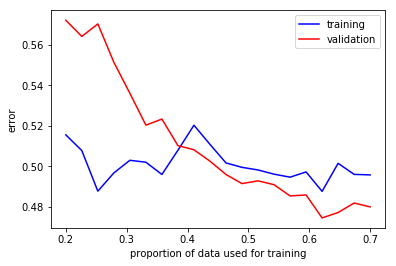

In [22]:
trainerror = np.zeros(shape = (tp.size, 1))
vaderror = np.zeros(shape = (tp.size, 1))
for i in range(0, tp.size):
    datain = titan.readdata('train.csv', tp[i], 0.7)
    X = np.array(datain['train'].ix[:,1:])
    y = np.array(datain['train'].ix[:,0])
    Xvad = np.array(datain['validation'].ix[:,1:])
    yvad = np.array(datain['validation'].ix[:,0])
    nfeature = X.shape[1]
    theta0 = np.zeros(shape = (nfeature, 1))
    regpara = 1.5
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (X, y, regpara))[0]
    trainerror[i] = titan.lfCost(theta, X, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvad, yvad, 0.0)
plt.plot(tp, trainerror, '-b', tp, vaderror,'-r')
plt.xlabel('proportion of data used for training')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

The learning curve suggests at leat 60% of the train.csv dataset is needed to produce a reasonable model. 

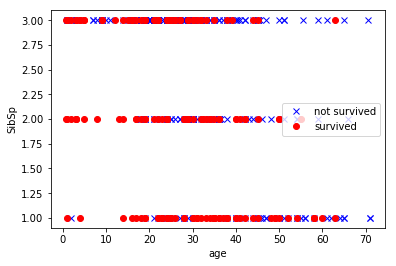

In [23]:
plt.plot(datain['train'].Age[y==0], datain['train'].Pclass[y==0], 'xb')
plt.plot(datain['train'].Age[y==1], datain['train'].Pclass[y==1], 'or')
plt.xlabel('age')
plt.ylabel('SibSp')
plt.legend(['not survived', 'survived'])
plt.show()

In [24]:
datain = titan.readdata('train.csv', 0.6, 0.6)
X = np.array(datain['train'].ix[:,1:])
y = np.array(datain['train'].ix[:,0])
Xvad = np.array(datain['validation'].ix[:,1:])
yvad = np.array(datain['validation'].ix[:,0])

Xq = titan.xquad(X)
Xvadq = titan.xquad(Xvad)

nfeature = Xq.shape[1]
theta0 = np.zeros(shape = (nfeature, 1))
regpara = 1.0

In [25]:
Xq.std(axis=0)

array([  3.37967906e+00,   3.47953899e+01,   7.55268057e-01,
         2.84195703e+00,   2.17928030e+00,   5.16970037e+01,
         1.66148020e+00,   3.47953899e+01,   9.22893428e+02,
         1.16935072e+01,   1.83862572e+01,   2.48554392e+01,
         1.82288123e+03,   2.77877786e+01,   7.55268057e-01,
         1.16935072e+01,   3.64393584e-01,   7.42167206e-01,
         6.65866491e-01,   4.80866332e+01,   5.80207890e-01,
         2.84195703e+00,   1.83862572e+01,   7.42167206e-01,
         3.81572402e+00,   1.66644537e+00,   8.65275151e+01,
         1.50799618e+00,   2.17928030e+00,   2.48554392e+01,
         6.65866491e-01,   1.66644537e+00,   2.55596855e+00,
         7.36686746e+01,   9.71506267e-01,   5.16970037e+01,
         1.82288123e+03,   4.80866332e+01,   8.65275151e+01,
         7.36686746e+01,   1.72325953e+04,   9.46297567e+01,
         1.66148020e+00,   2.77877786e+01,   5.80207890e-01,
         1.50799618e+00,   9.71506267e-01,   9.46297567e+01,
         1.97927622e+00]

In [26]:
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara))

In [27]:
y_predict = titan.sigmoid(np.dot(Xq,w[0]))
y_predict[y_predict > 0.5] = 1
y_predict[y_predict <= 0.5] = 0
(y_predict == y).sum()*1.0/y.size

0.83090379008746351

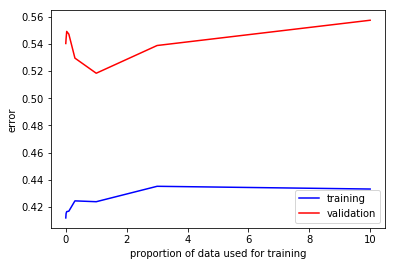

In [29]:
regpara = np.array([0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
trainerror = np.zeros(shape = (regpara.size, 1))
vaderror = np.zeros(shape = (regpara.size, 1))

for i in range(0, regpara.size):
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara[i]))[0]
    trainerror[i] = titan.lfCost(theta, Xq, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadq, yvad, 0.0)
plt.plot(regpara, trainerror, '-b', regpara, vaderror,'-r')
plt.xlabel('proportion of data used for training')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

The learning curve above suggests that adding 2nd order terms makes the model highly variant, i.e., overfitting. 

Below we experiment with taking features out from the original linear model, starting with Age. A large number of passengers in the databae does not have an age on the record.

In [16]:
features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked']
datain = titan.readdata('train.csv', 0.6, 0.6, features)
X = np.array(datain['train'].ix[:,1:])
y = np.array(datain['train'].ix[:,0])
Xvad = np.array(datain['validation'].ix[:,1:])
yvad = np.array(datain['validation'].ix[:,0])
X = titan.normdata(X)
Xvad = titan.normdata(Xvad)

nfeature = X.shape[1]
theta0 = np.zeros(shape = (nfeature, 1))
regpara = 1.0

In [18]:
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (X, y, regpara))
y_predict = titan.sigmoid(np.dot(X, w[0]))
y_predict[y_predict > 0.5] = 1
y_predict[y_predict <= 0.5] = 0
(y_predict == y).sum()*1.0/y.size

0.77009345794392525

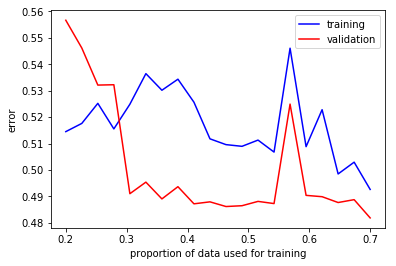

In [21]:
tp = np.linspace(0.2, 0.7, 20)
trainerror = np.zeros(shape = (tp.size, 1))
vaderror = np.zeros(shape = (tp.size, 1))
for i in range(0, tp.size):
    datain = titan.readdata('train.csv', tp[i], 0.7, features)
    X = np.array(datain['train'].ix[:,1:])
    y = np.array(datain['train'].ix[:,0])
    Xvad = np.array(datain['validation'].ix[:,1:])
    yvad = np.array(datain['validation'].ix[:,0])
    nfeature = X.shape[1]
    theta0 = np.zeros(shape = (nfeature, 1))
    regpara = 1.0
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (X, y, regpara))[0]
    trainerror[i] = titan.lfCost(theta, X, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvad, yvad, 0.0)
plt.plot(tp, trainerror, '-b', tp, vaderror,'-r')
plt.xlabel('proportion of data used for training')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

In [ ]:
As expected, the learning curve shows that without Age the error increased for all sizes of datasets. 